# Topic: Supervised Learning

#### Task: To predict the percentage score of the student on the basis of the number of hours invested

#### The type of concept used in this is Linear Regression

#### Created by: Vignesh Iyer



#### Step 1:Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Step 2: Importing the Dataset

In [2]:
url= 'http://bit.ly/w-data' # With the help of this url link we will be able to see the Dataset
df= pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Step 3. Preprocessing of the dataset(By understanding the dataset and also by checking for null Values)

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### Step4: Visualizing our Model through graphs

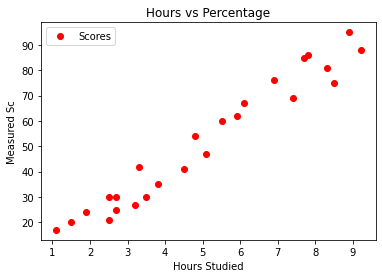

In [7]:
 df.plot(x='Hours', y='Scores', style='o', color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Measured Sc')  
plt.show()

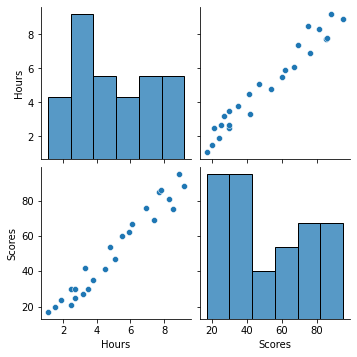

In [8]:
sns.pairplot(data=df)  #Plotting the pairplot

<AxesSubplot:>

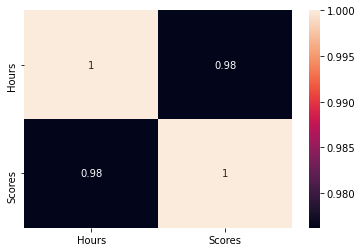

In [9]:
Correlate=df.corr()
sns.heatmap(Correlate, annot=True)           #plotting the heatmap


#### Step5: Setting the Values

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#### Step6: Splitting the values into Test and Train

In [11]:
from sklearn.model_selection import train_test_split  # sklearn is the part of scikit-learn library
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

#### Step7: Training the Model using Linear Regression 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
Model=regressor.fit(X_train, y_train) 

print("Training is Successfully implemented.")

Training is Successfully implemented.


In [13]:
m= Model.coef_  # Evaluating the coefficient of the line
m

array([9.78856669])

In [14]:
C= Model.intercept_  # Evaluating the y-intercept for the line i.e the value when the independant variable is 0
C

2.3708153823418883

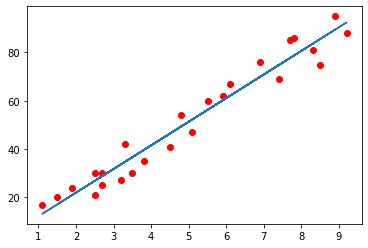

In [15]:
# plotting the linear regression graph
line = m*X+C
plt.scatter(X, y, color='red')
plt.plot(X, line);
plt.show()

In [16]:
y_pred= Model.predict(X_test)
y_pred


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

#### Step8: Comparing the tested and predicted score 

In [17]:
x= {'Main test Score' : y_test, 'Predicted Score' : y_pred}
df1 = pd.DataFrame.from_dict(x, orient='index')
df = df1.transpose()
df

,Main test Score,Predicted Score
0,20.0,17.053665
1,27.0,33.694229
2,69.0,74.806209
3,30.0,26.842232
4,62.0,60.123359
5,35.0,39.567369
6,24.0,20.969092
7,86.0,78.721636


#### Step9: Plotting the Linear regression graph on the basis of y_test and y_pred 

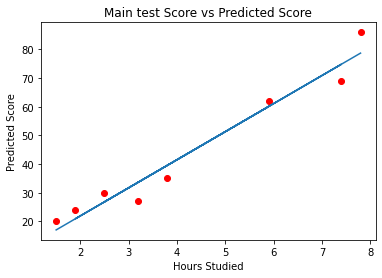

In [18]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test,y_pred );
plt.title('Main test Score vs Predicted Score')
plt.ylabel('Predicted Score')
plt.xlabel('Hours Studied')
plt.show()

#### Step10: Checking for the accuracy

In [19]:
Train=[[Model.score(X_train, y_train)*100]]
Train


[[94.84997422695115]]

In [20]:
Test= [[Model.score(X_test, y_test)*100]]
Test

[[95.68211104435257]]

#### Step11: Predicting the Value

In [21]:
h=[[9.25]]
i= Model.predict(h)
Predicted_score= print("The predicted Score is {}".format(round(i[0])))

The predicted Score is 93


The Predicted Sore is 93 when the hours part is 9.25

#### Step 12 Evaluating the model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651
